In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [117]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'META'

data = yf.download(stock,start,end)



[*********************100%%**********************]  1 of 1 completed


In [118]:
#to reset the index to numbers instead of the dates
data.reset_index(inplace=True)

In [119]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2912,2023-12-14,333.850006,334.700012,328.640015,333.170013,333.170013,19607300
2913,2023-12-15,331.989990,338.660004,331.220001,334.920013,334.920013,30001600
2914,2023-12-18,337.480011,347.559998,337.019989,344.619995,344.619995,18993900
2915,2023-12-19,345.579987,353.600006,345.119995,350.359985,350.359985,17729400


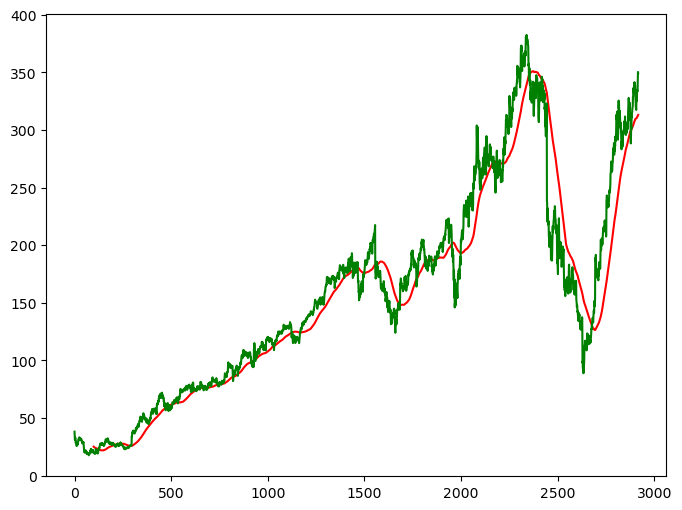

In [120]:
#calculating the moving average
ma_100_days = data.Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()



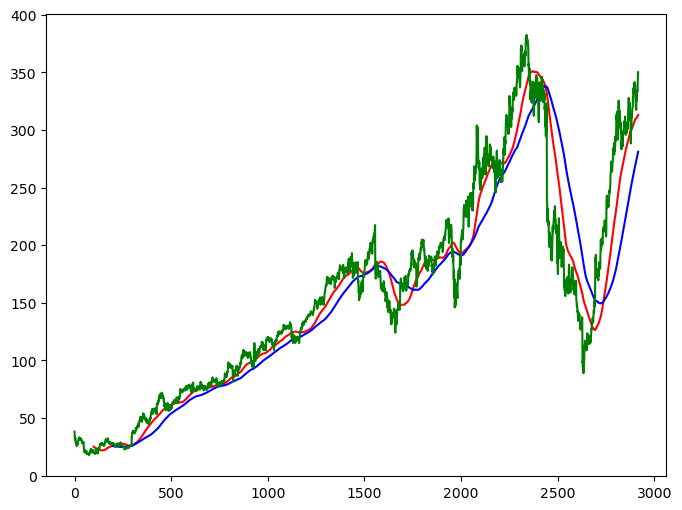

In [121]:
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()


In [122]:
#dropping the NA values in the data
data.dropna(inplace=True)



In [123]:
#making training and testing data at 80 20 split
data_train = pd.DataFrame(data.Close[0:int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [124]:
data_train.shape[0]

2333

In [125]:
data_test.shape[0]

584

In [126]:
#scaling the data to fit between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)
data_train_scale.shape

(2333, 1)

In [127]:
#predicting the price based on the previous 100 days
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [128]:
#converting them to numpy arrays
x,y = np.array(x), np.array(y)
x.shape

(2233, 100, 1)

In [129]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential



In [130]:
model = Sequential()
#each layer acts independently 
#units are neurons return sequences output of one layer is input of the next layer dropout is to avoid overfitting 
model.add(LSTM(units= 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
#this means only one value is being predicted
model.add(Dense(units=1))

In [131]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x,y,epochs = 50,batch_size=32,verbose = 1)

Epoch 1/50
70/70 [==============================] - 7s 59ms/step - loss: 0.0274
Epoch 2/50
70/70 [==============================] - 4s 58ms/step - loss: 0.0055
Epoch 3/50
70/70 [==============================] - 4s 58ms/step - loss: 0.0060
Epoch 4/50
70/70 [==============================] - 4s 61ms/step - loss: 0.0042
Epoch 5/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0046
Epoch 6/50
70/70 [==============================] - 4s 64ms/step - loss: 0.0043
Epoch 7/50
70/70 [==============================] - 4s 60ms/step - loss: 0.0039
Epoch 8/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0037
Epoch 9/50
70/70 [==============================] - 4s 58ms/step - loss: 0.0037
Epoch 10/50
70/70 [==============================] - 4s 57ms/step - loss: 0.0036
Epoch 11/50
70/70 [==============================] - 4s 59ms/step - loss: 0.0032
Epoch 12/50
70/70 [==============================] - 4s 58ms/step - loss: 0.0029
Epoch 13/50
70/70 [==================

In [132]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_14 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_15 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_16 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_20 (LSTM)              (None, 120)              

In [133]:
pas_100_days = data_train.tail(100)

In [134]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)
data_test

,Close
0,306.260010
1,313.089996
2,313.019989
3,312.459991
4,311.540009
...,...
679,333.170013
680,334.920013
681,344.619995
682,350.359985


In [135]:
data_test_scale = scaler.fit_transform(data_test)

In [136]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y = np.array(x), np.array(y)    
y_predict = model.predict(x)
print(y_predict.shape)
#y_predict_last = y_predict[:, -1, 0]  # This selects the last time step from each sequence and removes the singleton dimension
#y_predict_last.shape 

19/19 [==============================] - 1s 20ms/step
(584, 1)


In [137]:

from sklearn.metrics import mean_squared_error,r2_score

# Recalculate MSE, RMSE, and R² with the corrected predictions
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_predict)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 0.00496337403545518
RMSE: 0.07045121741641644
R²: -0.5262681523953756


In [138]:

scale = 1/scaler.scale_


In [139]:
y_predict = y_predict*scale
y_predict

array([[26.72516193],
       [26.74224888],
       [26.73991089],
       [26.71772845],
       [26.67640513],
       [26.61772392],
       [26.54506725],
       [26.46082116],
       [26.36713575],
       [26.26714433],
       [26.16444784],
       [26.06928534],
       [25.99143703],
       [25.93627372],
       [25.90501028],
       [25.89650614],
       [25.9082922 ],
       [25.93713025],
       [25.97928388],
       [26.0296576 ],
       [26.08219887],
       [26.1300904 ],
       [26.16902329],
       [26.19642796],
       [26.21550329],
       [26.23126174],
       [26.25055557],
       [26.27877306],
       [26.31941465],
       [26.37670181],
       [26.4529332 ],
       [26.55182773],
       [26.67664548],
       [26.82867125],
       [27.00895384],
       [27.21824929],
       [27.45353787],
       [27.71030969],
       [27.98363967],
       [28.2662473 ],
       [28.55123224],
       [28.83262499],
       [29.10608608],
       [29.3671493 ],
       [29.61242784],
       [29

In [140]:
y = y*scale
y

array([ 1.57543422,  1.66616654,  1.47645493,  1.47645493,  1.44346078,
        1.77339436,  1.03104342,  1.04754049,  1.31148735,  1.45995786,
        4.53659104,  3.9839517 ,  3.47255505,  2.78794228,  2.8704245 ,
        2.84568046,  2.90341864,  2.83743193,  2.26004698,  1.86412669,
        1.22075503,  1.9301134 ,  1.75689886,  3.8189857 ,  3.66226666,
        4.80878644,  4.28089271,  4.42936321,  5.43566102,  5.17171416,
        6.77189398,  6.94510852,  7.11832463,  7.91016522,  8.47105309,
        7.67921251,  8.02564158,  8.23185027,  7.62147275,  8.05038719,
        8.33907966,  8.45455602,  8.12462244,  8.66901324,  7.48949932,
        7.44000968,  8.23185027,  7.98440048,  7.94315937,  7.03584085,
        7.58848018,  7.24204953,  6.86262473,  6.74714838,  7.33278185,
        8.47105309,  8.28134148,  9.09792768,  9.64231848,  9.34537747,
       10.60737518, 11.19300709, 11.53943774, 10.90431619, 10.20320635,
        9.99699767, 10.23619892,  9.84027863, 10.72285154, 10.79

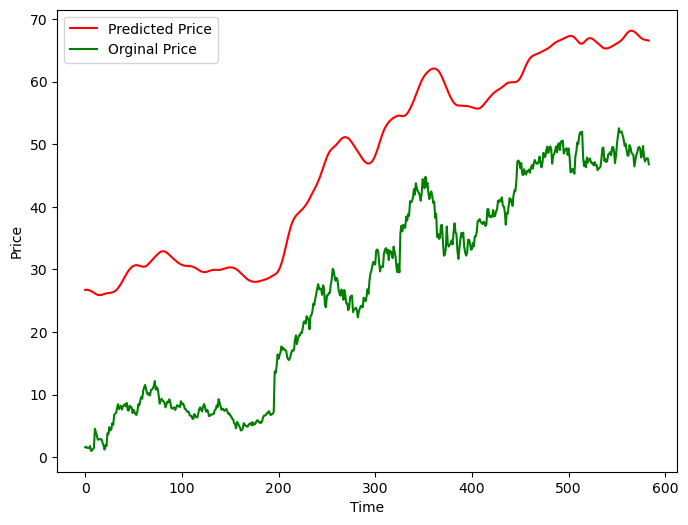

In [141]:
plt.figure(figsize=(8,6))
plt.plot(y_predict,'r',label= 'Predicted Price')
plt.plot(y,'g', label = "Orginal Price")
plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()
plt.show()


In [142]:
model.save("Stock Predictions Model.keras")